In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


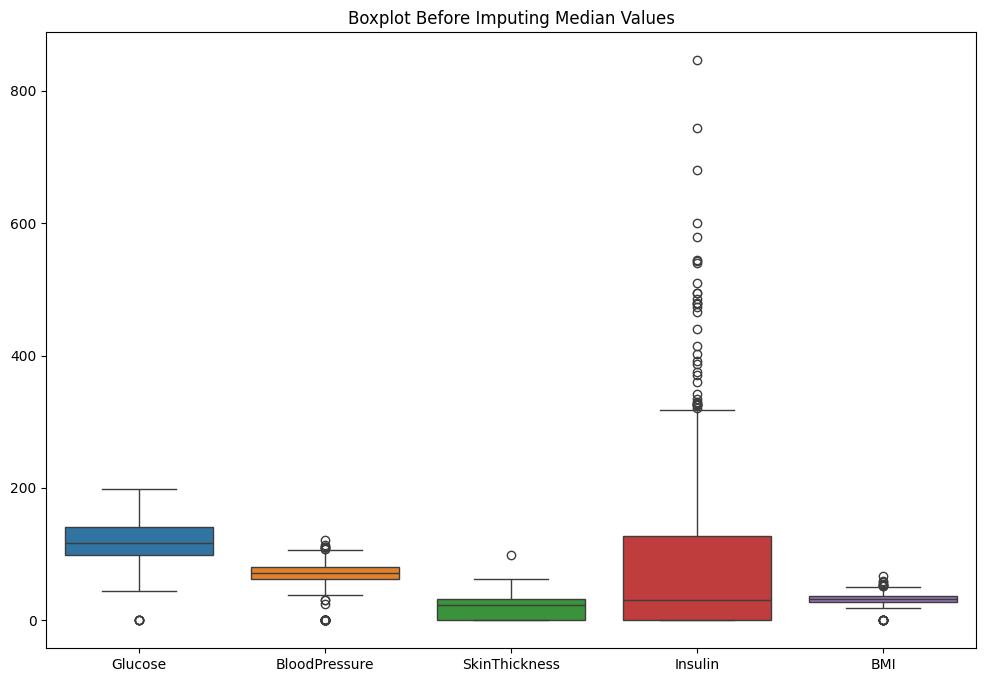

In [ ]:

# Step 1: Load the Kaggle Pima Indians Diabetes dataset
file_path = "C:/Users/hp/Downloads/Deep Learning/diabetes.csv"
df = pd.read_csv(file_path)

# Step 2: Visualize the Data Distribution using a Boxplot (Before Imputing Median Values)
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[columns_to_check])
plt.title("Boxplot Before Imputing Median Values")
plt.show()


In [ ]:

# Step 3: Handle Missing Values
# Features like Glucose, BloodPressure, SkinThickness, Insulin, and BMI should not have zero values, so we treat them as missing
df[columns_to_check] = df[columns_to_check].replace(0, pd.NA)

# Step 4: Replace missing values with the median of each column
df.fillna(df.median(), inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_27380\3593482944.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.median(), inplace=True)


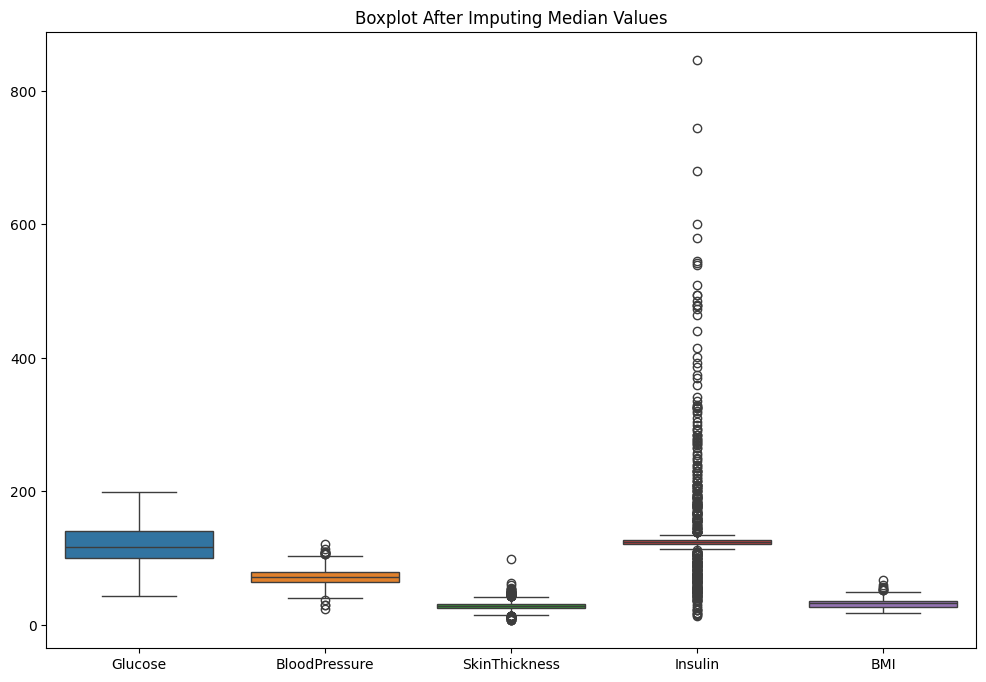

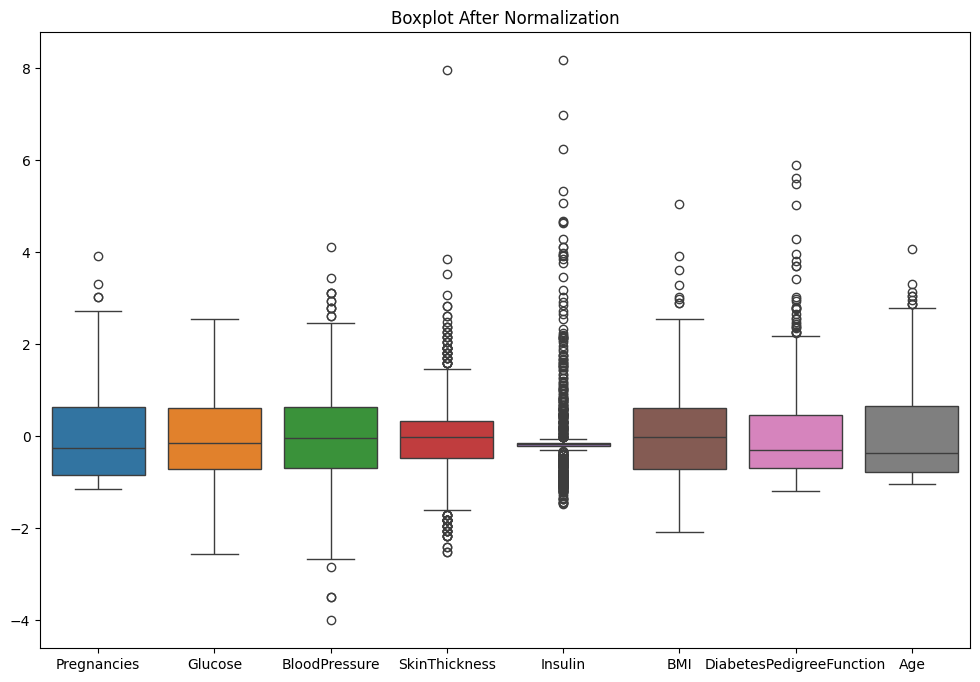

In [ ]:

# Step 5: Visualize the Data Distribution using a Boxplot (After Imputing Median Values)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[columns_to_check])
plt.title("Boxplot After Imputing Median Values")
plt.show()

# Step 6: Normalize the Features using StandardScaler
scaler = StandardScaler()
X = df.drop('Outcome', axis=1)  # X contains all features (independent variables)
y = df['Outcome']               # y contains the target variable (Outcome, which is diabetes or not)
X_scaled = scaler.fit_transform(X)

# Step 7: Visualize the Data Distribution using a Boxplot (After Normalization)
df_normalized = pd.DataFrame(X_scaled, columns=df.columns[:-1])  # Create a DataFrame for the normalized features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_normalized)
plt.title("Boxplot After Normalization")
plt.show()


In [ ]:

# Step 8: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 9: Train and Evaluate Single-Layer Perceptron (SLP)
slp = Perceptron(max_iter=1000, random_state=42)
slp.fit(X_train, y_train)
y_pred_slp = slp.predict(X_test)

# Calculate accuracy for Single-Layer Perceptron
accuracy_slp = accuracy_score(y_test, y_pred_slp)


In [ ]:

# Step 10: Train and Evaluate Multi-Layer Perceptron (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)


In [ ]:

# Calculate accuracy for Multi-Layer Perceptron
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

# Step 11: Print the Results for Comparison
print(f"Single-Layer Perceptron (SLP) Accuracy: {accuracy_slp}")
print(f"Multi-Layer Perceptron (MLP) Accuracy: {accuracy_mlp}")

# Step 12: Confusion Matrices and Classification Reports for Detailed Evaluation
cm_slp = confusion_matrix(y_test, y_pred_slp)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)


Single-Layer Perceptron (SLP) Accuracy: 0.7532467532467533
Multi-Layer Perceptron (MLP) Accuracy: 0.7142857142857143


In [ ]:

print("\nSingle-Layer Perceptron (SLP) Confusion Matrix:\n", cm_slp)
print("Single-Layer Perceptron (SLP) Classification Report:\n", classification_report(y_test, y_pred_slp))

print("\nMulti-Layer Perceptron (MLP) Confusion Matrix:\n", cm_mlp)
print("Multi-Layer Perceptron (MLP) Classification Report:\n", classification_report(y_test, y_pred_mlp))



Single-Layer Perceptron (SLP) Confusion Matrix:
 [[77 22]
 [16 39]]
Single-Layer Perceptron (SLP) Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154


Multi-Layer Perceptron (MLP) Confusion Matrix:
 [[75 24]
 [20 35]]
Multi-Layer Perceptron (MLP) Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77        99
           1       0.59      0.64      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.72       154



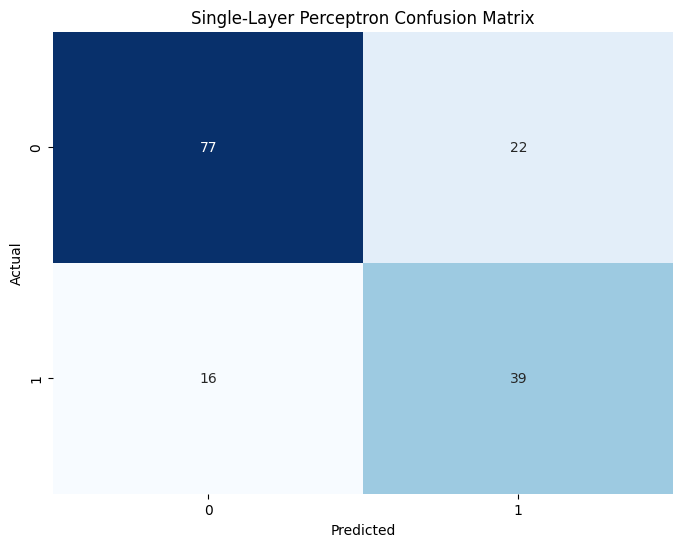

In [ ]:

# Step 13: Heatmap for Confusion Matrices
plt.figure(figsize=(8, 6))
sns.heatmap(cm_slp, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Single-Layer Perceptron Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


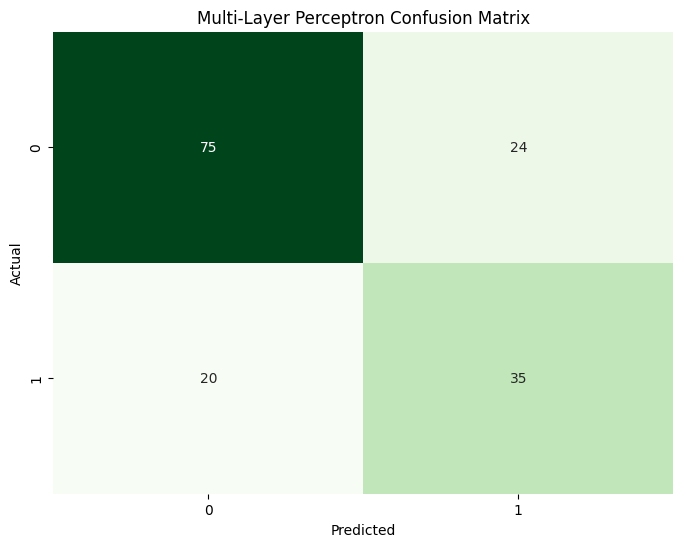

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Multi-Layer Perceptron Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


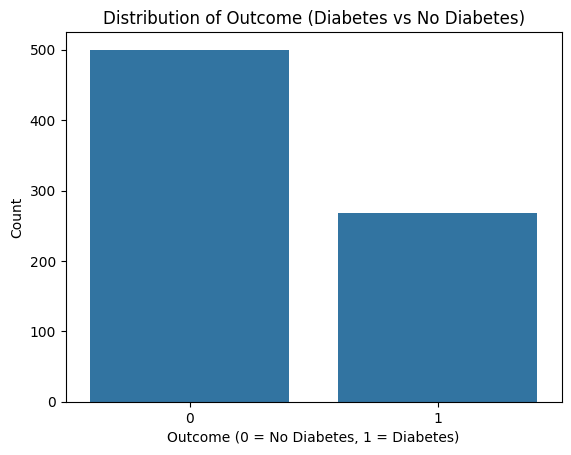

In [ ]:

# Bar plot for Outcome distribution
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome (Diabetes vs No Diabetes)')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()


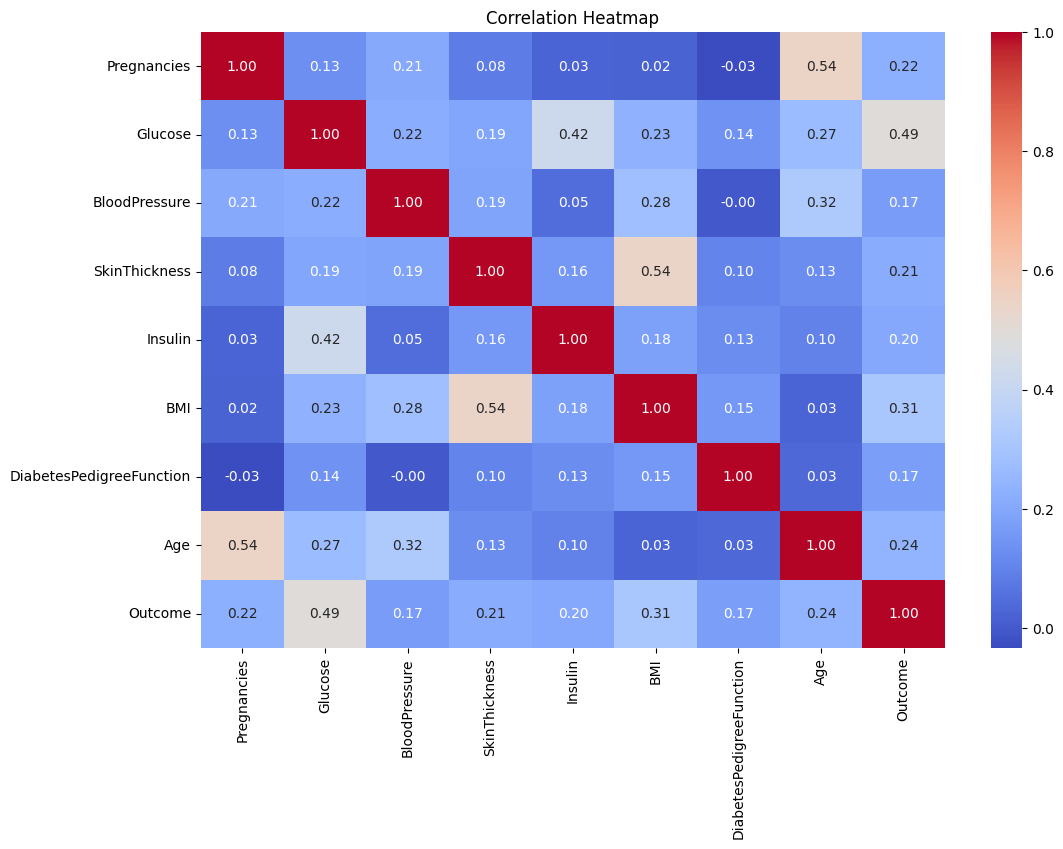

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


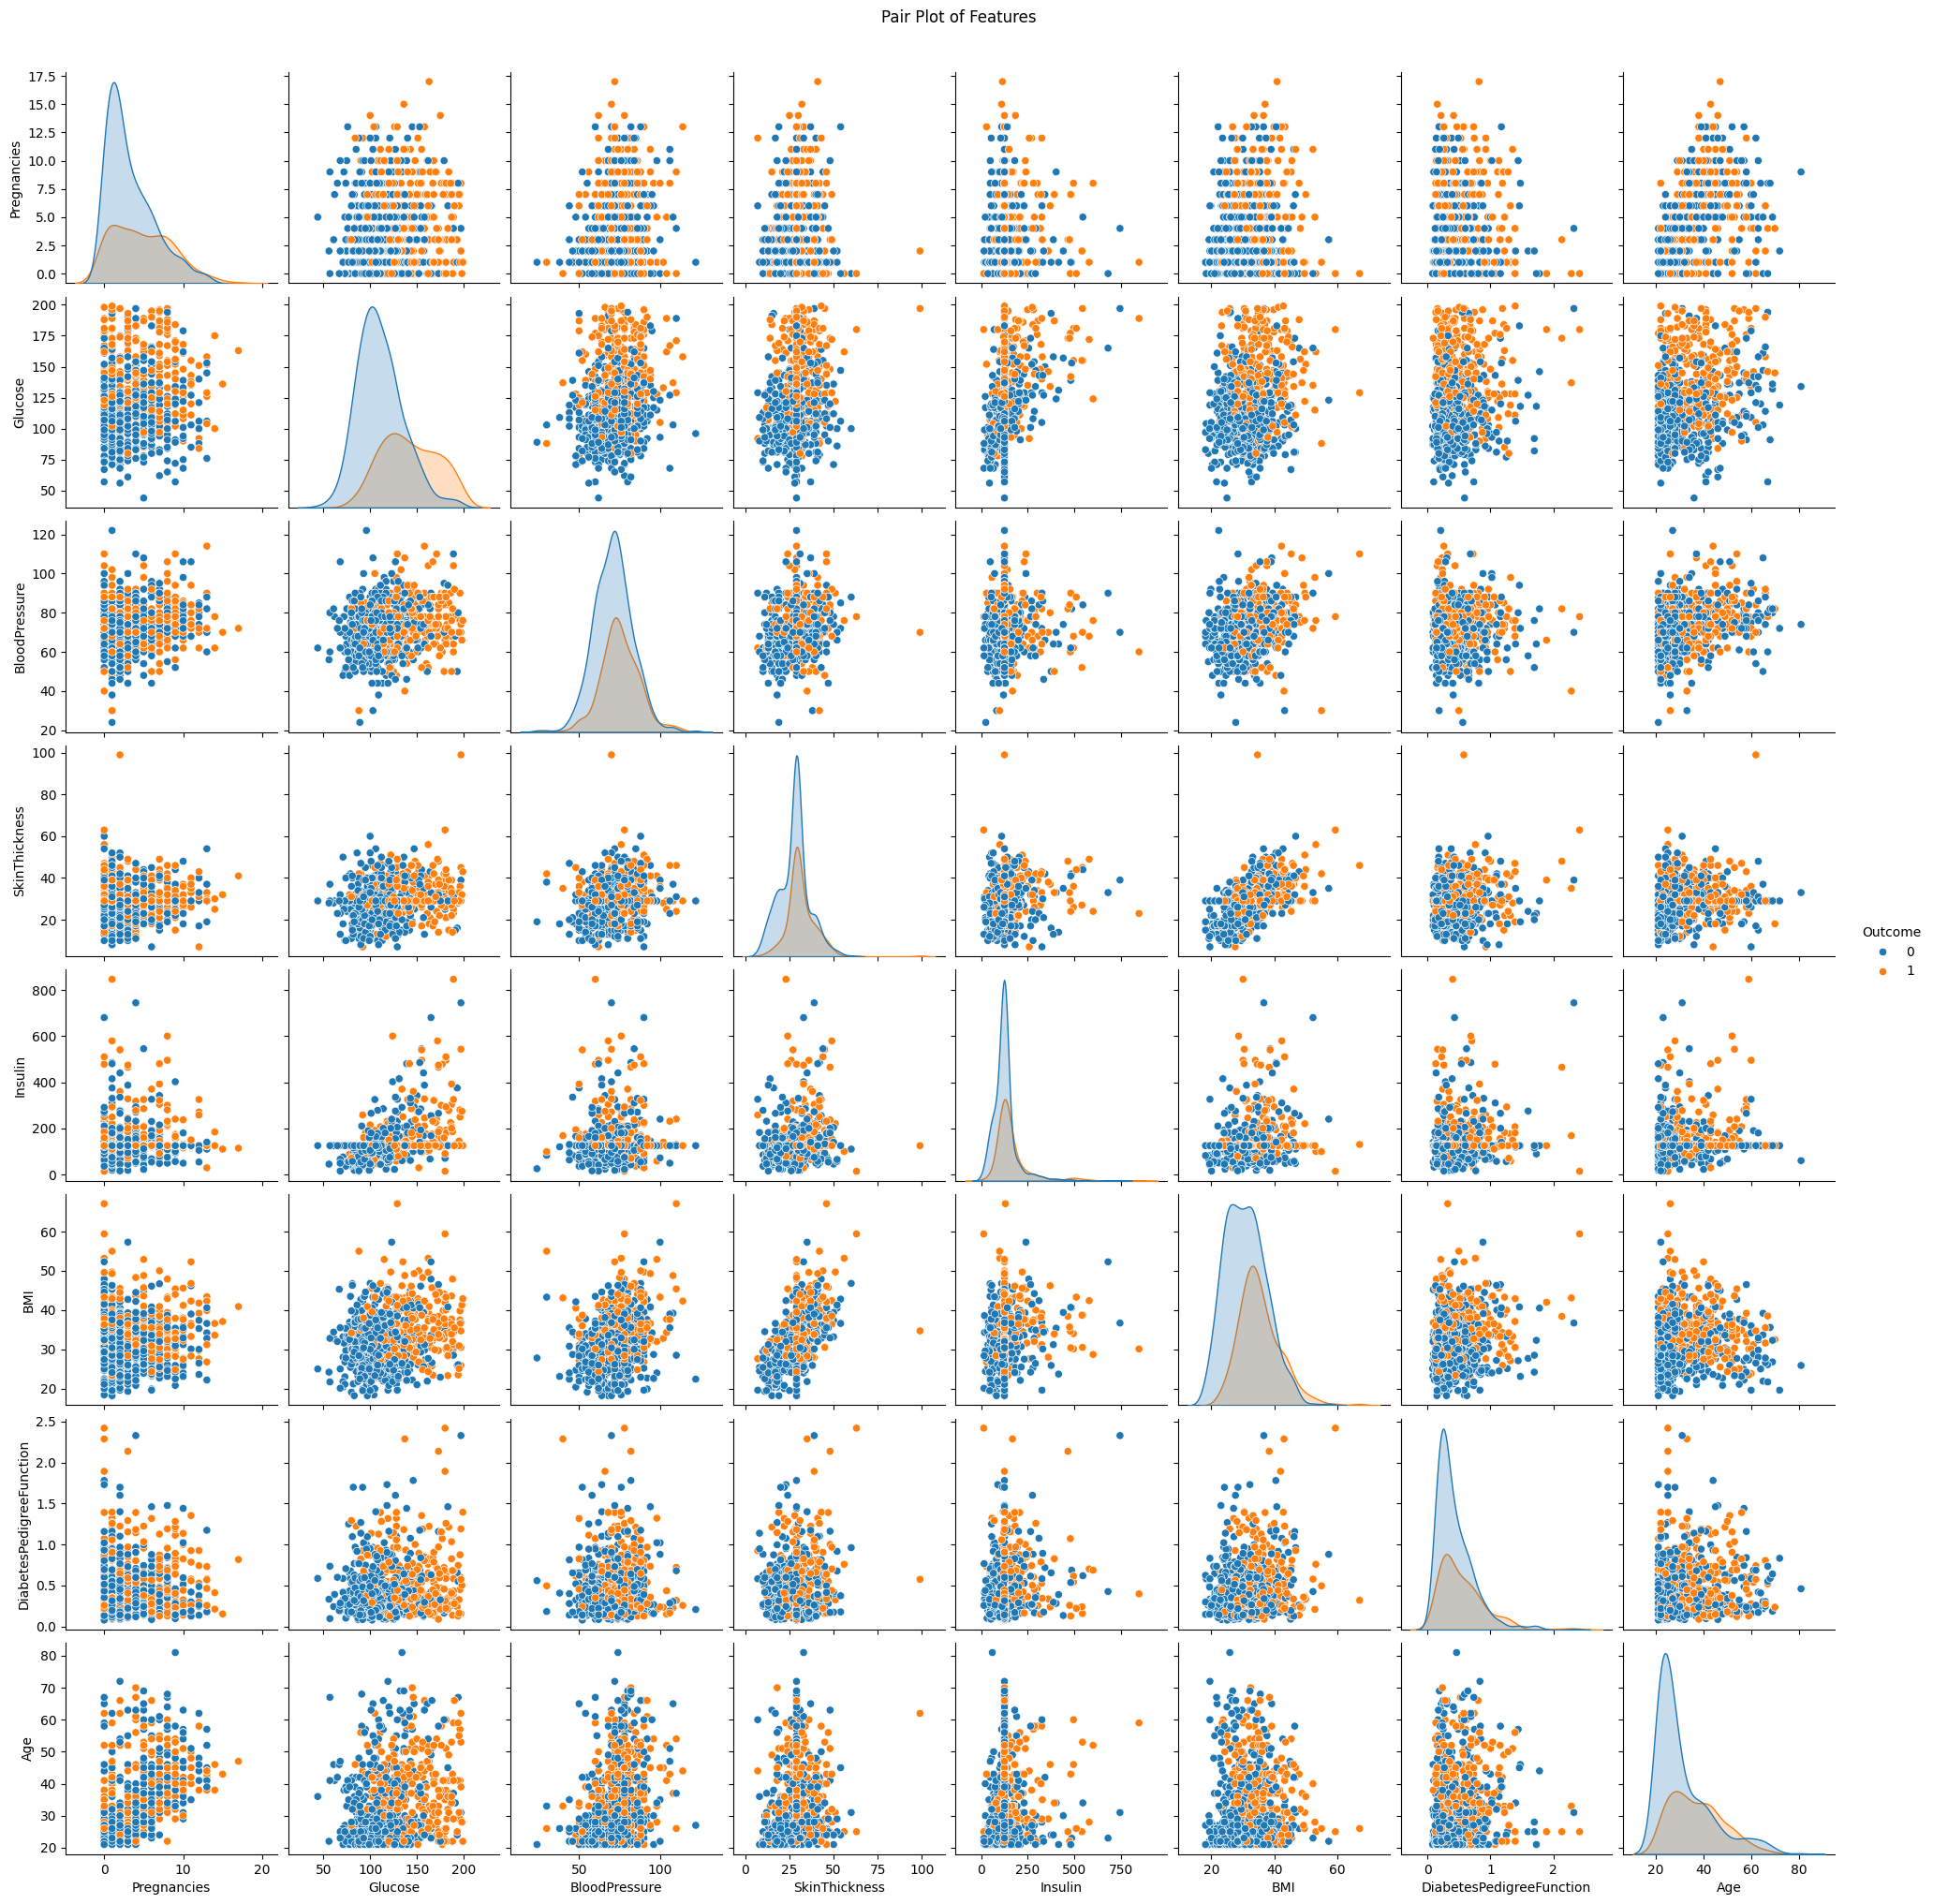

In [ ]:
# Pair Plot
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()
